In [239]:
import numpy as np 
import h5py as h5
import matplotlib.pyplot as plt
from scipy.signal import periodogram, welch, lfilter, filtfilt, freqz, firwin, butter
from scipy.fft import rfft, irfft, rfftfreq
from scipy.optimize import curve_fit, least_squares

In [240]:
f = h5.File("xueshi_data.hdf5",'r')


In [241]:
datasets = ['electronic', 'shotnoise', 'squeezing', 'antisqueezing']
channels = ['C1', 'C2', 'C3', 'C4']

for ds in datasets:
    data = np.array([f[ds][c][c][:] for c in channels])
    data = data.squeeze()
    globals()[ds] = data


In [242]:
electronic.shape, shotnoise.shape, squeezing.shape, antisqueezing.shape

((4, 200, 100002), (4, 200, 100002), (4, 200, 100002), (4, 200, 100002))

In [243]:
electronic = electronic.reshape(4,200,-1)
shotnoise = shotnoise.reshape(4,200,-1)
squeezing = squeezing.reshape(4,200,-1)
antisqueezing = antisqueezing.reshape(4,200,-1)

In [244]:
dt = f['shotnoise']['C1'].attrs["horiz_interval"]
fs = 1/dt
N = len(electronic[0,0])
t = np.linspace(0, fs*N, N, endpoint=False)
f = rfftfreq(N, dt)

In [245]:
ELECTRONIC = 10*np.log10(abs(rfft(electronic[0,0,:])))
SHOTNOISE = 10*np.log10(abs(rfft(shotnoise[0,0,:])))
SQUEEZING = 10*np.log10(abs(rfft(squeezing[0,0,:])))
ANTISQUEEZING = 10*np.log10(abs(rfft(antisqueezing[0,0,:])))

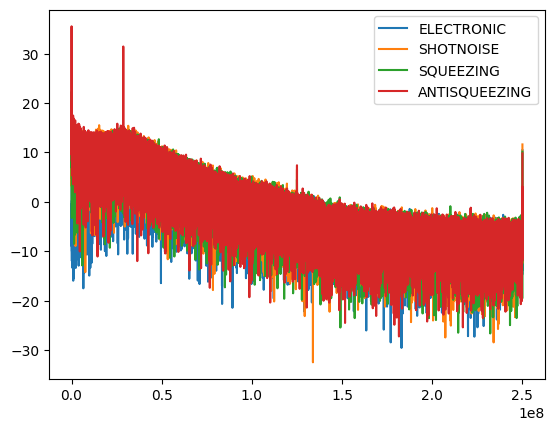

In [246]:
plt.plot(f,ELECTRONIC, label=f'ELECTRONIC')
plt.plot(f,SHOTNOISE, label=f'SHOTNOISE')
plt.plot(f,SQUEEZING, label=f'SQUEEZING')
plt.plot(f,ANTISQUEEZING, label=f'ANTISQUEEZING')

plt.legend()

In [261]:
b, a = butter(5, [28*1e6,29*1e6,124.7*1e6,125.2*1e6], 'bandstop', fs = fs)
fir = firwin(10001, [28.5*1e6,28.9*1e6], pass_zero='bandstop', fs = fs)
fir2 = firwin(1001, [124.9*1e6,125.1*1e6], pass_zero='bandstop', fs = fs)

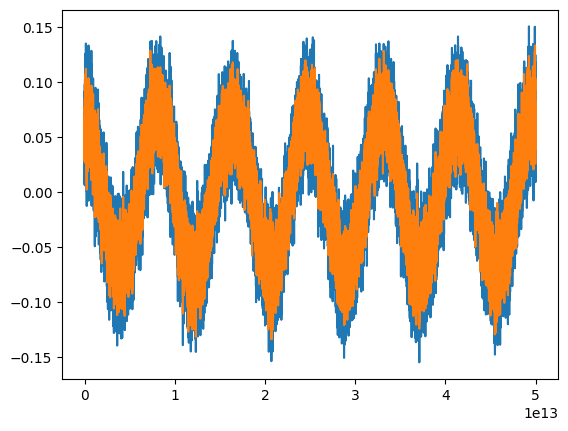

In [262]:
plt.plot(t, antisqueezing[0,0])
filter_signal = filtfilt(fir,1.0, antisqueezing[0,0])
filter_signal = filtfilt(fir2,1.0, filter_signal)
plt.plot(t,filter_signal)


(124000000.0, 126000000.0)

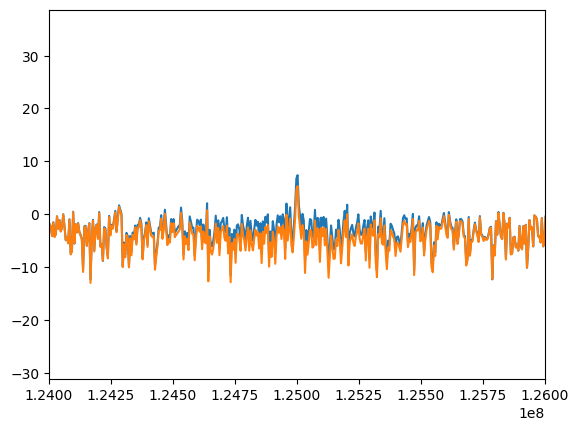

In [263]:
plt.plot(f,ANTISQUEEZING)
fftfilter = 10*np.log10(abs(rfft(filter_signal)))
plt.plot(f,fftfilter)
plt.xlim((124*1e6,126*1e6))